In [159]:
import numpy as np
import pandas as pd

In [160]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv')

In [161]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [162]:
data['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

In [163]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [164]:
data.columns.str.lower().str.replace(' ', '_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [165]:
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.lower()

In [166]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [167]:
data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [168]:
data.dtypes[data.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [169]:
strings = data.dtypes[data.dtypes == 'object'].index

In [170]:
for col in strings:
    data[col] = data[col].str.lower().str.replace(' ', '_')

In [171]:
data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


EDA

In [172]:
for col in data.columns:
    print(col,":",data[col].nunique())

make : 48
model : 914
year : 28
engine_fuel_type : 10
engine_hp : 356
engine_cylinders : 9
transmission_type : 5
driven_wheels : 4
number_of_doors : 3
market_category : 71
vehicle_size : 3
vehicle_style : 16
highway_mpg : 59
city_mpg : 69
popularity : 48
msrp : 6049


In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [174]:
sns.histplot(data.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

In [175]:
sns.histplot(data.msrp[data.msrp<100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

In [176]:
sns.histplot(data.msrp[data.msrp>100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

In [177]:
## Apply logrithmic distribution
np.log1p([1, 10, 100, 1000])

array([0.69314718, 2.39789527, 4.61512052, 6.90875478])

`np.log1p([1, 10, 100, 1000]) == np.log(0+1, 10+1, 100+1, 1000+1)`

In [178]:
sns.histplot(np.log1p(data.msrp), bins=50) #tail is vanished

<Axes: xlabel='msrp', ylabel='Count'>

In [179]:
## Missing values
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setup Validation Environment

In [180]:
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(2382, 2382, 7150)

In [181]:
data_train = data.iloc[n_train:]
data_val = data.iloc[n_train:n_val]
data_test = data.iloc[n_val:n_val+n_test]

In [182]:
## with shuffles
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [183]:
n_train

7150

In [184]:
n_val

2382

In [185]:
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train+n_val]]
data_test = data.iloc[idx[n_train+n_val:]]

In [186]:
data_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [187]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [188]:
np.log1p(data_train.msrp.values)

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [189]:
y_train = np.log1p(data_train.msrp.values)
y_test = np.log1p(data_test.msrp.values)
y_val = np.log1p(data_val.msrp.values)

In [190]:
## remove msrp from data
del data_train['msrp']
del data_val['msrp']   
del data_test['msrp']

In [191]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [192]:
x1 = [453, 11, 86]
W0 = 0
W = [1, 1, 1]

In [193]:
def linear_regression(x, W0, W):
    assert len(x) == len(W)
    y = W0
    for i in range(len(x)):
        y = y + W[i] * x[i]
    
    return y

In [194]:
linear_regression(x=x1, W0=7.17, W=[0.01, 0.04, 0.0002])

12.1572

In [195]:
np.exp(12.1572)

np.float64(190460.4803887146)

In [196]:
np.expm1(12.1572)

np.float64(190459.4803887146)

### 2.6 Linear regression vector form

In [197]:
def dot(xi,w):
    assert len(xi) == len(w)
    res = 0.0
    for j in range(len(xi)):
        res += xi[j] * w[j]
    return res

In [198]:
def linear_regression(xi,w,W0):
    return W0 + dot(xi, w)

In [199]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.0002]
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.0002]

In [200]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x3 = [1,453,11,86]
X = [x1,x2,x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [201]:
X.dot(w_new)

array([ 9.887 ,  9.8962, 12.1572])

In [202]:
def linear_regression(X):
    return X.dot(w_new)

2.7 Training Linear Regression Model

In [203]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [204]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [205]:
# X.T.dot(X)

In [206]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [207]:
X = np.column_stack([ones,X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [208]:
XTX = X.transpose().dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [209]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [210]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [211]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00,  1.04083409e-17,  5.55111512e-17,
        -8.67361738e-19],
       [ 1.81898940e-12,  1.00000000e+00,  0.00000000e+00,
        -6.66133815e-16],
       [ 5.68434189e-14,  4.44089210e-16,  1.00000000e+00,
        -2.77555756e-17],
       [ 9.09494702e-13,  5.32907052e-15,  2.84217094e-14,
         1.00000000e+00]])

In [212]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [213]:
list(np.column_stack([ones,X]))

[array([1.000e+00, 1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03]),
 array([1.000e+00, 1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03]),
 array([  1.,   1., 453.,  11.,  86.]),
 array([  1.,   1., 158.,  24., 185.]),
 array([  1.,   1., 172.,  25., 201.]),
 array([  1.,   1., 413.,  11.,  86.]),
 array([  1.,   1.,  38.,  54., 185.]),
 array([  1.,   1., 142.,  25., 431.]),
 array([  1.,   1., 453.,  31.,  86.])]

In [214]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [215]:
train_linear_regression(X,y)

(np.float64(25844.754055766953),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

2.8 Car Price model

In [216]:
data_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [217]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [218]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

In [219]:
X_train = data_train[base].fillna(0).values

In [220]:
w0,w = train_linear_regression(X_train,y_train)

In [221]:
y_pred = w0 + X_train.dot(w)

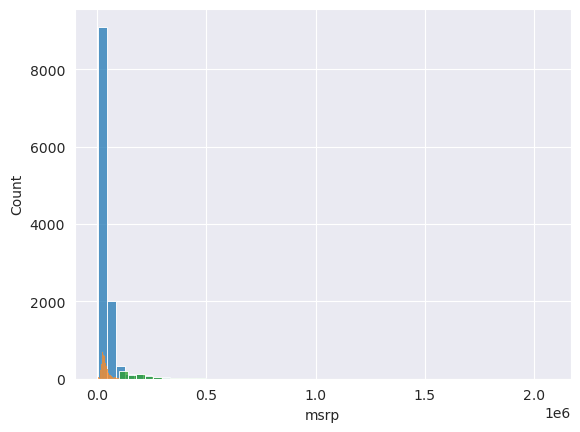

In [222]:
sns.histplot(y_pred, color='red',alpha=0.5,bins=50)
sns.histplot(y_train, color='blue',alpha=0.5,bins=50)
plt.show()

In [223]:
 e=y_train-y_pred
 e

array([0.02781925, 0.50032323, 0.22125759, ..., 0.14957294, 0.64458959,
       0.54198867], shape=(7150,))

In [224]:
rmse = np.sqrt(np.mean(np.power(e,2)))
rmse

np.float64(0.7554192603920132)

In [225]:
def RMSE(y,y_pred):
    e = y-y_pred
    se = e**2
    mse = se.mean()
    return np.sqrt(mse)

In [226]:
RMSE(y_train,y_pred)

np.float64(0.7554192603920132)

2.10 Validating the model

In [227]:
def prepare_df(df: pd.DataFrame,base:list)-> np.array:
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [228]:
X_train = prepare_df(data_train,base=base)
w0, w = train_linear_regression(X_train,y_train)
X_val = prepare_df(data_val,base=base)

In [229]:
train_linear_regression(X_train,y_train)

(np.float64(7.927257388070113),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [235]:
y_pred = w0 + X_val.dot(w)
y_pred
RMSE(y_val,y_pred)

np.float64(0.7616530991301562)